In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# df = pd.read_csv('C:\Users\DELL\OneDrive\Documents\CVDPredictionSystem\Dataset.csv')
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\CVDPredictionSystem\Dataset.csv')

In [3]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [5]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

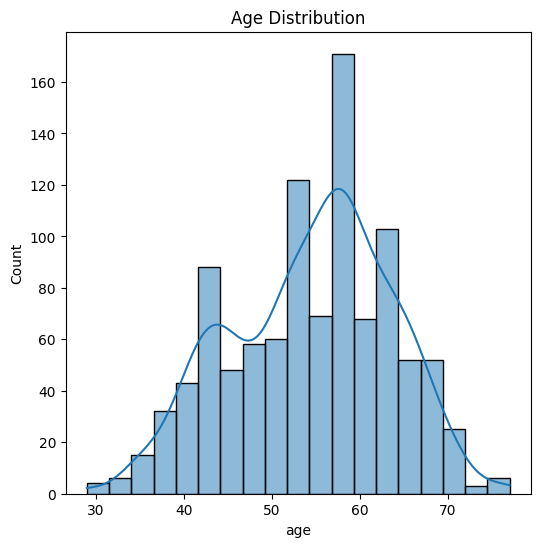

In [6]:
# Age Distribution
plt.figure(figsize=(6, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

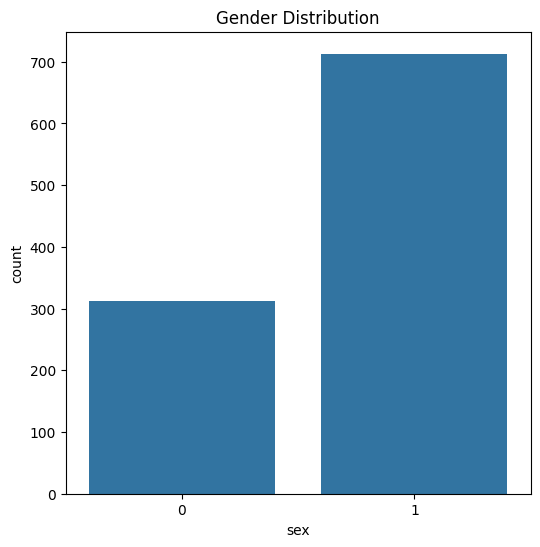

In [7]:
# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

In [8]:
# Data Preparation
X = df.drop('target', axis=1)
y = df['target']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Model Functions
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"\n{model_name} Classification Report:\n")
    print(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"{model_name} Accuracy: {accuracy:.2f}%")
    return accuracy

In [12]:
# Initialize models
models = {
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


SVM Classification Report:

              precision    recall  f1-score     support
0              0.934066  0.833333  0.880829  102.000000
1              0.850877  0.941748  0.894009  103.000000
accuracy       0.887805  0.887805  0.887805    0.887805
macro avg      0.892472  0.887540  0.887419  205.000000
weighted avg   0.892269  0.887805  0.887451  205.000000


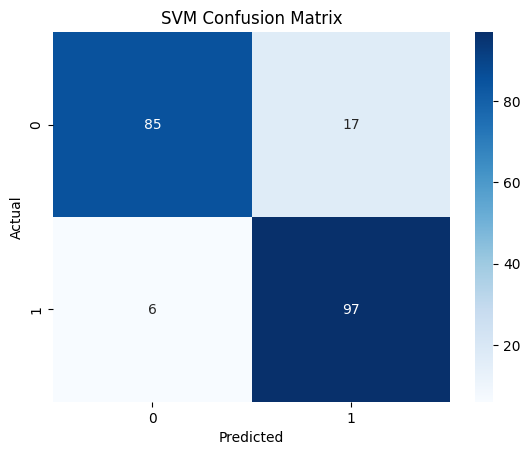

SVM Accuracy: 88.78%

Naive Bayes Classification Report:

              precision    recall  f1-score  support
0              0.867470  0.705882  0.778378    102.0
1              0.754098  0.893204  0.817778    103.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.810784  0.799543  0.798078    205.0
weighted avg   0.810508  0.800000  0.798174    205.0


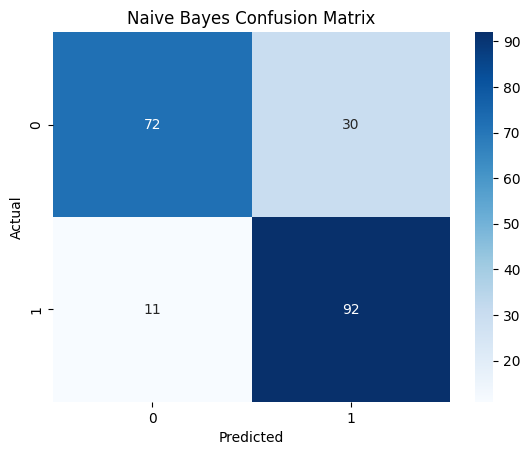

Naive Bayes Accuracy: 80.00%

KNN Classification Report:

              precision    recall  f1-score     support
0              0.877778  0.774510  0.822917  102.000000
1              0.800000  0.893204  0.844037  103.000000
accuracy       0.834146  0.834146  0.834146    0.834146
macro avg      0.838889  0.833857  0.833477  205.000000
weighted avg   0.838699  0.834146  0.833528  205.000000


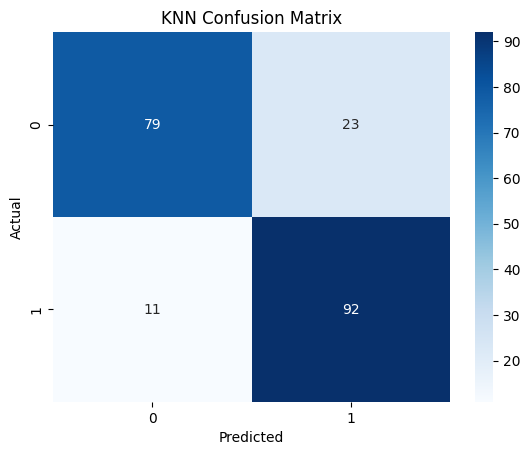

KNN Accuracy: 83.41%

Decision Tree Classification Report:

              precision    recall  f1-score     support
0              0.971429  1.000000  0.985507  102.000000
1              1.000000  0.970874  0.985222  103.000000
accuracy       0.985366  0.985366  0.985366    0.985366
macro avg      0.985714  0.985437  0.985364  205.000000
weighted avg   0.985784  0.985366  0.985364  205.000000


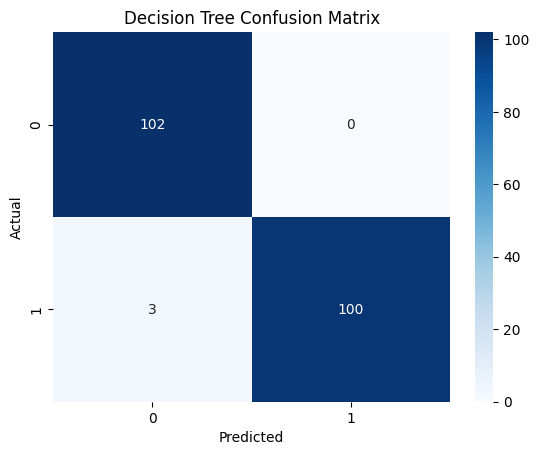

Decision Tree Accuracy: 98.54%

Random Forest Classification Report:

              precision    recall  f1-score     support
0              0.971429  1.000000  0.985507  102.000000
1              1.000000  0.970874  0.985222  103.000000
accuracy       0.985366  0.985366  0.985366    0.985366
macro avg      0.985714  0.985437  0.985364  205.000000
weighted avg   0.985784  0.985366  0.985364  205.000000


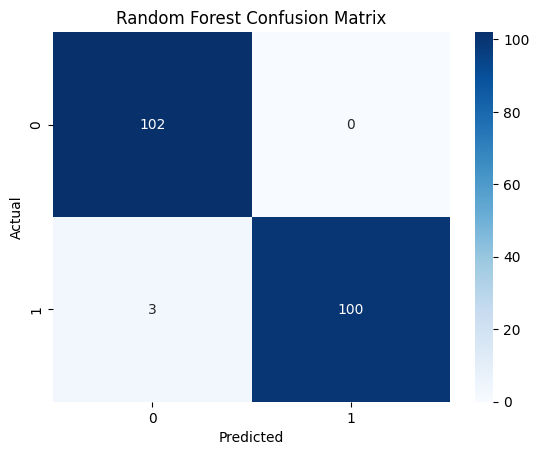

Random Forest Accuracy: 98.54%


In [13]:
# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    accuracy_scores[name] = train_and_evaluate_model(model, name)

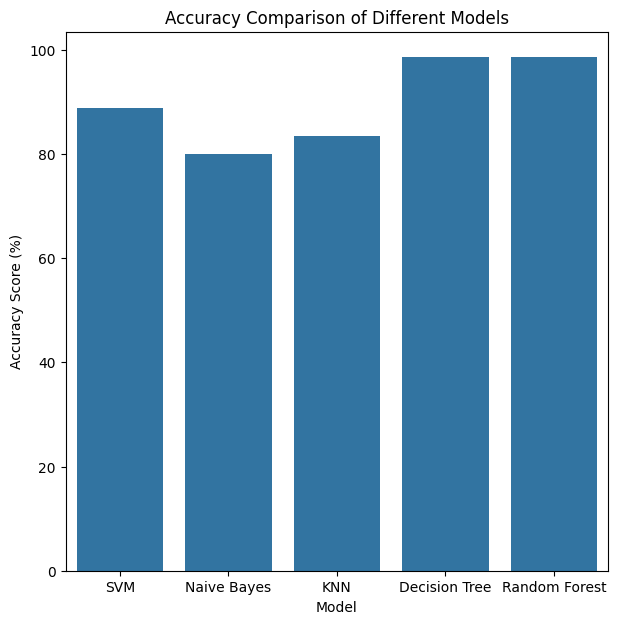

In [14]:
# Accuracy Comparison
plt.figure(figsize=(7, 7))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Accuracy Comparison of Different Models')
plt.ylabel('Accuracy Score (%)')
plt.xlabel('Model')
plt.show()

In [15]:
import streamlit as st
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [16]:
def train_model():
    # Labels: 1 = Disease, 0 = No Disease

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

In [17]:
model = train_model() 

In [18]:
# Streamlit UI
def main():
    st.title("Cardiovascular Disease Prediction")
    st.markdown("Enter the details below to check if you are at risk.")
    
    # Input fields
    age = st.number_input("Age", min_value=18, max_value=100, value=50)
    sex = st.radio("Sex", ("Male", "Female"))
    cp = st.selectbox("Chest Pain Type", [0, 1, 2, 3])
    trestbps = st.number_input("Resting Blood Pressure", min_value=80, max_value=200, value=120)
    chol = st.number_input("Cholesterol Level", min_value=100, max_value=400, value=200)
    thalach = st.number_input("Maximum Heart Rate Achieved", min_value=60, max_value=220, value=150)
    
    # Convert categorical inputs to numerical values
    sex = 1 if sex == "Male" else 0
    
    # Predict
    if st.button("Predict"): 
        input_data = np.array([[age, sex, cp, trestbps, chol, thalach]])
        prediction = model.predict(input_data)[0]
        
        if prediction == 1:
            st.error("High risk! You may have cardiovascular disease.")
        else:
            st.success("Low risk. You are unlikely to have cardiovascular disease.")

In [19]:
if __name__ == "__main__":
    main()

2025-02-14 11:49:35.220 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:49:36.378 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-14 11:49:36.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:49:36.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:49:36.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:49:36.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:49:36.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:49:36.387 Threa